simulation_images

In [5]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Function to plot from saved data file
def plot_from_saved_data(data_file='simulation_data.pkl', map_image_path='MapV3.png', output_folder='Visualization/simulation_images'):
    # Load the saved data from the file
    with open(data_file, 'rb') as file:
        all_step_data = pickle.load(file)

    # Load the map image
    img = mpimg.imread(map_image_path)

    # Iterate through the steps and plot each one
    for step_data in all_step_data:
        fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
        ax.imshow(img, extent=[0, 920, 0, 392])  # Assuming grid dimensions

        # Extract positions for plotting
        x_mosquitoes, y_mosquitoes = zip(*step_data["mosquito_positions"]) if step_data["mosquito_positions"] else ([], [])
        x_infectious_mosquitoes, y_infectious_mosquitoes = zip(*step_data["infectious_mosquito_positions"]) if step_data["infectious_mosquito_positions"] else ([], [])
        x_birds, y_birds = zip(*step_data["bird_positions"]) if step_data["bird_positions"] else ([], [])
        x_infectious_birds, y_infectious_birds = zip(*step_data["infectious_bird_positions"]) if step_data["infectious_bird_positions"] else ([], [])

        # Regular Mosquitoes (non-infectious)
        ax.scatter(x_mosquitoes, y_mosquitoes, c='red', label='Mosquitoes', s=0.7, alpha=0.4)
        # Infectious Mosquitoes
        ax.scatter(x_infectious_mosquitoes, y_infectious_mosquitoes, c='darkred', label='Infectious Mosquitoes', s=1, alpha=1)

        # Regular Birds (non-infectious)
        ax.scatter(x_birds, y_birds, c='blue', label='Birds', s=0.5, alpha=0.7)
        # Infectious Birds
        ax.scatter(x_infectious_birds, y_infectious_birds, c='darkblue', label='Infectious Birds', s=1, alpha=1)

        # Set plot limits and title
        ax.set_xlim(0, 920)
        ax.set_ylim(0, 392)
        ax.set_title(f'Step {step_data["step"] + 1}')
        ax.legend()
        
        # Save the figure
        plt.savefig(os.path.join(output_folder, f'step_{step_data["step"] + 1:03d}.png'))
        plt.close(fig)

    print(f"Visualization complete! Saved to folder: {output_folder}")

# Call this function separately to generate plots
plot_from_saved_data(data_file='simulation_data.pkl')


Op2_simulation_images

In [5]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Function to plot from saved data file using hexbin visualization
def plot_from_saved_data_hexbin_separated(data_file='simulation_data.pkl', map_image_path='MapV3.png', output_folder='Visualization/Op2_simulation_images'):
    # Load the saved data from the file
    with open(data_file, 'rb') as file:
        all_step_data = pickle.load(file)

    # Load the map image
    img = mpimg.imread(map_image_path)

    # Create separate folders for bird and mosquito visualizations
    mosquito_folder = os.path.join(output_folder, 'Mosquitoes')
    bird_folder = os.path.join(output_folder, 'Birds')

    # Create the output folders if they don't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    if not os.path.exists(mosquito_folder):
        os.makedirs(mosquito_folder)
    if not os.path.exists(bird_folder):
        os.makedirs(bird_folder)

    # Iterate through the steps and plot each one
    for step_data in all_step_data:
        # Plot mosquito data only
        if step_data["mosquito_positions"]:
            fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
            ax.imshow(img, extent=[0, 920, 0, 392], alpha=0.7)  # Set a slight transparency for the map

            x_mosquitoes, y_mosquitoes = zip(*step_data["mosquito_positions"]) if step_data["mosquito_positions"] else ([], [])
            if x_mosquitoes and y_mosquitoes:
                hb1 = ax.hexbin(x_mosquitoes, y_mosquitoes, gridsize=100, cmap='Reds', mincnt=1, alpha=1, linewidths=0.5, edgecolors='gray')
                cb1 = fig.colorbar(hb1, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
                cb1.set_label('Mosquito Density')

            ax.set_xlim(0, 920)
            ax.set_ylim(0, 392)
            ax.set_title(f'Mosquito Density - Step {step_data["step"] + 1}')
            plt.savefig(os.path.join(mosquito_folder, f'hexbin_step_{step_data["step"] + 1:03d}.png'))
            plt.close(fig)

        # Plot bird data only
        if step_data["bird_positions"]:
            fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
            ax.imshow(img, extent=[0, 920, 0, 392], alpha=0.7)  # Set a slight transparency for the map

            x_birds, y_birds = zip(*step_data["bird_positions"]) if step_data["bird_positions"] else ([], [])
            if x_birds and y_birds:
                hb2 = ax.hexbin(x_birds, y_birds, gridsize=100, cmap='Blues', mincnt=1, alpha=1, linewidths=0.5, edgecolors='gray')
                cb2 = fig.colorbar(hb2, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
                cb2.set_label('Bird Density')

            ax.set_xlim(0, 920)
            ax.set_ylim(0, 392)
            ax.set_title(f'Bird Density - Step {step_data["step"] + 1}')
            plt.savefig(os.path.join(bird_folder, f'hexbin_step_{step_data["step"] + 1:03d}.png'))
            plt.close(fig)

    print(f"Hexbin visualization complete! Saved to folders: {mosquito_folder} and {bird_folder}")

# Call this function separately to generate hexbin plots for separated birds and mosquitoes
plot_from_saved_data_hexbin_separated(data_file='simulation_data_1.pkl')


Hexbin visualization complete! Saved to folders: Op2_simulation_images\Mosquitoes and Op2_simulation_images\Birds


Op2_weighted_combined_risk

In [13]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

# Function to plot combined risk from saved data file using threshold-based spillover model
def plot_spillover_risk_with_fixed_range(data_file='simulation_data.pkl', map_image_path='MapV3.png', output_folder='Visualization/Op2_spillover_fixed_range'):
    # Load the saved data from the file
    with open(data_file, 'rb') as file:
        all_step_data = pickle.load(file)

    # Load the map image
    img = mpimg.imread(map_image_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Determine global min and max risk across all steps
    global_min_risk = float('inf')
    global_max_risk = -float('inf')

    for step_data in all_step_data:
        # Extract positions and create 2D histograms for densities
        x_mosquitoes, y_mosquitoes = zip(*step_data["mosquito_positions"]) if step_data["mosquito_positions"] else ([], [])
        x_birds, y_birds = zip(*step_data["bird_positions"]) if step_data["bird_positions"] else ([], [])

        mosquito_density, xedges, yedges = np.histogram2d(x_mosquitoes, y_mosquitoes, bins=[920, 392], range=[[0, 920], [0, 392]])
        bird_density, _, _ = np.histogram2d(x_birds, y_birds, bins=[920, 392], range=[[0, 920], [0, 392]])

        # Calculate combined spillover risk (example formula)
        combined_risk = np.maximum(0, (mosquito_density - 0.2) * bird_density)

        # Update global min/max risk
        global_min_risk = min(global_min_risk, np.min(combined_risk))
        global_max_risk = max(global_max_risk, np.max(combined_risk))

    # Iterate through the steps and plot each one
    for step_data in all_step_data:
        fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
        ax.imshow(img, extent=[0, 920, 0, 392], alpha=0.7)  # Set a slight transparency for the map

        # Extract positions and create 2D histograms for densities
        x_mosquitoes, y_mosquitoes = zip(*step_data["mosquito_positions"]) if step_data["mosquito_positions"] else ([], [])
        x_birds, y_birds = zip(*step_data["bird_positions"]) if step_data["bird_positions"] else ([], [])

        mosquito_density, xedges, yedges = np.histogram2d(x_mosquitoes, y_mosquitoes, bins=[920, 392], range=[[0, 920], [0, 392]])
        bird_density, _, _ = np.histogram2d(x_birds, y_birds, bins=[920, 392], range=[[0, 920], [0, 392]])

        # Calculate combined spillover risk (same formula as before)
        combined_risk = np.maximum(0, (mosquito_density - 0.2) * bird_density)

        # Plot the hexbin with a fixed color range across all steps
        cmap = plt.get_cmap('coolwarm')
        hb = ax.hexbin(np.repeat(xedges[:-1], len(yedges)-1), np.tile(yedges[:-1], len(xedges)-1),
                       C=combined_risk.flatten(), gridsize=100, cmap=cmap, mincnt=1, alpha=0.4, linewidths=0.5, edgecolors='gray',
                       vmin=0, vmax=0.1)  # Use fixed color range

        # Set plot limits and title
        ax.set_xlim(0, 920)
        ax.set_ylim(0, 392)
        ax.set_title(f'Threshold-Based Combined Spillover Risk - Step {step_data["step"] + 1}')

        # Add color bar with fixed range and fade lower values
        cbar = fig.colorbar(hb, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
        cbar.set_label('Spillover Risk')

        # Save the figure
        plt.savefig(os.path.join(output_folder, f'combined_step_{step_data["step"] + 1:03d}.png'))
        plt.close(fig)

    print(f"Spillover risk visualization complete! Saved to folder: {output_folder}")

# Call this function separately to generate combined risk plots with fixed color range
plot_spillover_risk_with_fixed_range(data_file='simulation_data_1.pkl')


Spillover risk visualization complete! Saved to folder: Op2_spillover_fixed_range


Option 4: Weighted Scatter Plots

In [15]:
import matplotlib.pyplot as plt
import os
import pickle

# Function to plot from saved data file using weighted scatter plots
def plot_weighted_scatter(data_file='simulation_data.pkl', map_image_path='MapV3.png', output_folder='Visualization/Op4_images'):
    # Load the saved data from the file
    with open(data_file, 'rb') as file:
        all_step_data = pickle.load(file)

    # Load the map image
    img = mpimg.imread(map_image_path)

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through the steps and plot each one
    for step_data in all_step_data:
        if step_data["step"] % 10 != 0:  # Plot every 20 steps for quick overview
            continue

        # Create a new figure for each step
        fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
        ax.imshow(img, extent=[0, 920, 0, 392], alpha=0.5)  # Set transparency for the map

        # Count the number of agents at each position
        mosquito_positions = step_data["mosquito_positions"]
        bird_positions = step_data["bird_positions"]

        # Use a dictionary to count occurrences
        mosquito_counts = {}
        bird_counts = {}

        for pos in mosquito_positions:
            if pos in mosquito_counts:
                mosquito_counts[pos] += 1
            else:
                mosquito_counts[pos] = 1

        for pos in bird_positions:
            if pos in bird_counts:
                bird_counts[pos] += 1
            else:
                bird_counts[pos] = 1

        # Prepare the data for weighted scatter plotting
        mosquito_x, mosquito_y, mosquito_sizes = [], [], []
        for (x, y), count in mosquito_counts.items():
            mosquito_x.append(x)
            mosquito_y.append(y)
            mosquito_sizes.append(count * 3)  # Scale size by count

        bird_x, bird_y, bird_sizes = [], [], []
        for (x, y), count in bird_counts.items():
            bird_x.append(x)
            bird_y.append(y)
            bird_sizes.append(count * 3)  # Scale size by count

        # Plot weighted scatter for mosquito densities
        ax.scatter(mosquito_x, mosquito_y, c='red', s=mosquito_sizes, label='Mosquitoes', alpha=0.1)

        # Plot weighted scatter for bird densities
        ax.scatter(bird_x, bird_y, c='blue', s=bird_sizes, label='Birds', alpha=0.1)

        # Set plot limits and title
        ax.set_xlim(0, 920)
        ax.set_ylim(0, 392)
        ax.set_title(f'Step {step_data["step"] + 1}')
        ax.legend()

        # Save the figure
        plt.savefig(os.path.join(output_folder, f'weighted_scatter_step_{step_data["step"] + 1:03d}.png'))
        plt.close(fig)

    print(f"Weighted scatter plot visualization complete! Saved to folder: {output_folder}")

# Call this function separately to generate weighted scatter plots
plot_weighted_scatter(data_file='simulation_data_1.pkl')


Weighted scatter plot visualization complete! Saved to folder: Op4_images


Animate

Animation saved as high_quality_animation.mp4 in folder: Op2_weighted_combined_risk with quality settings (DPI=500, Bitrate=3000 kbps)


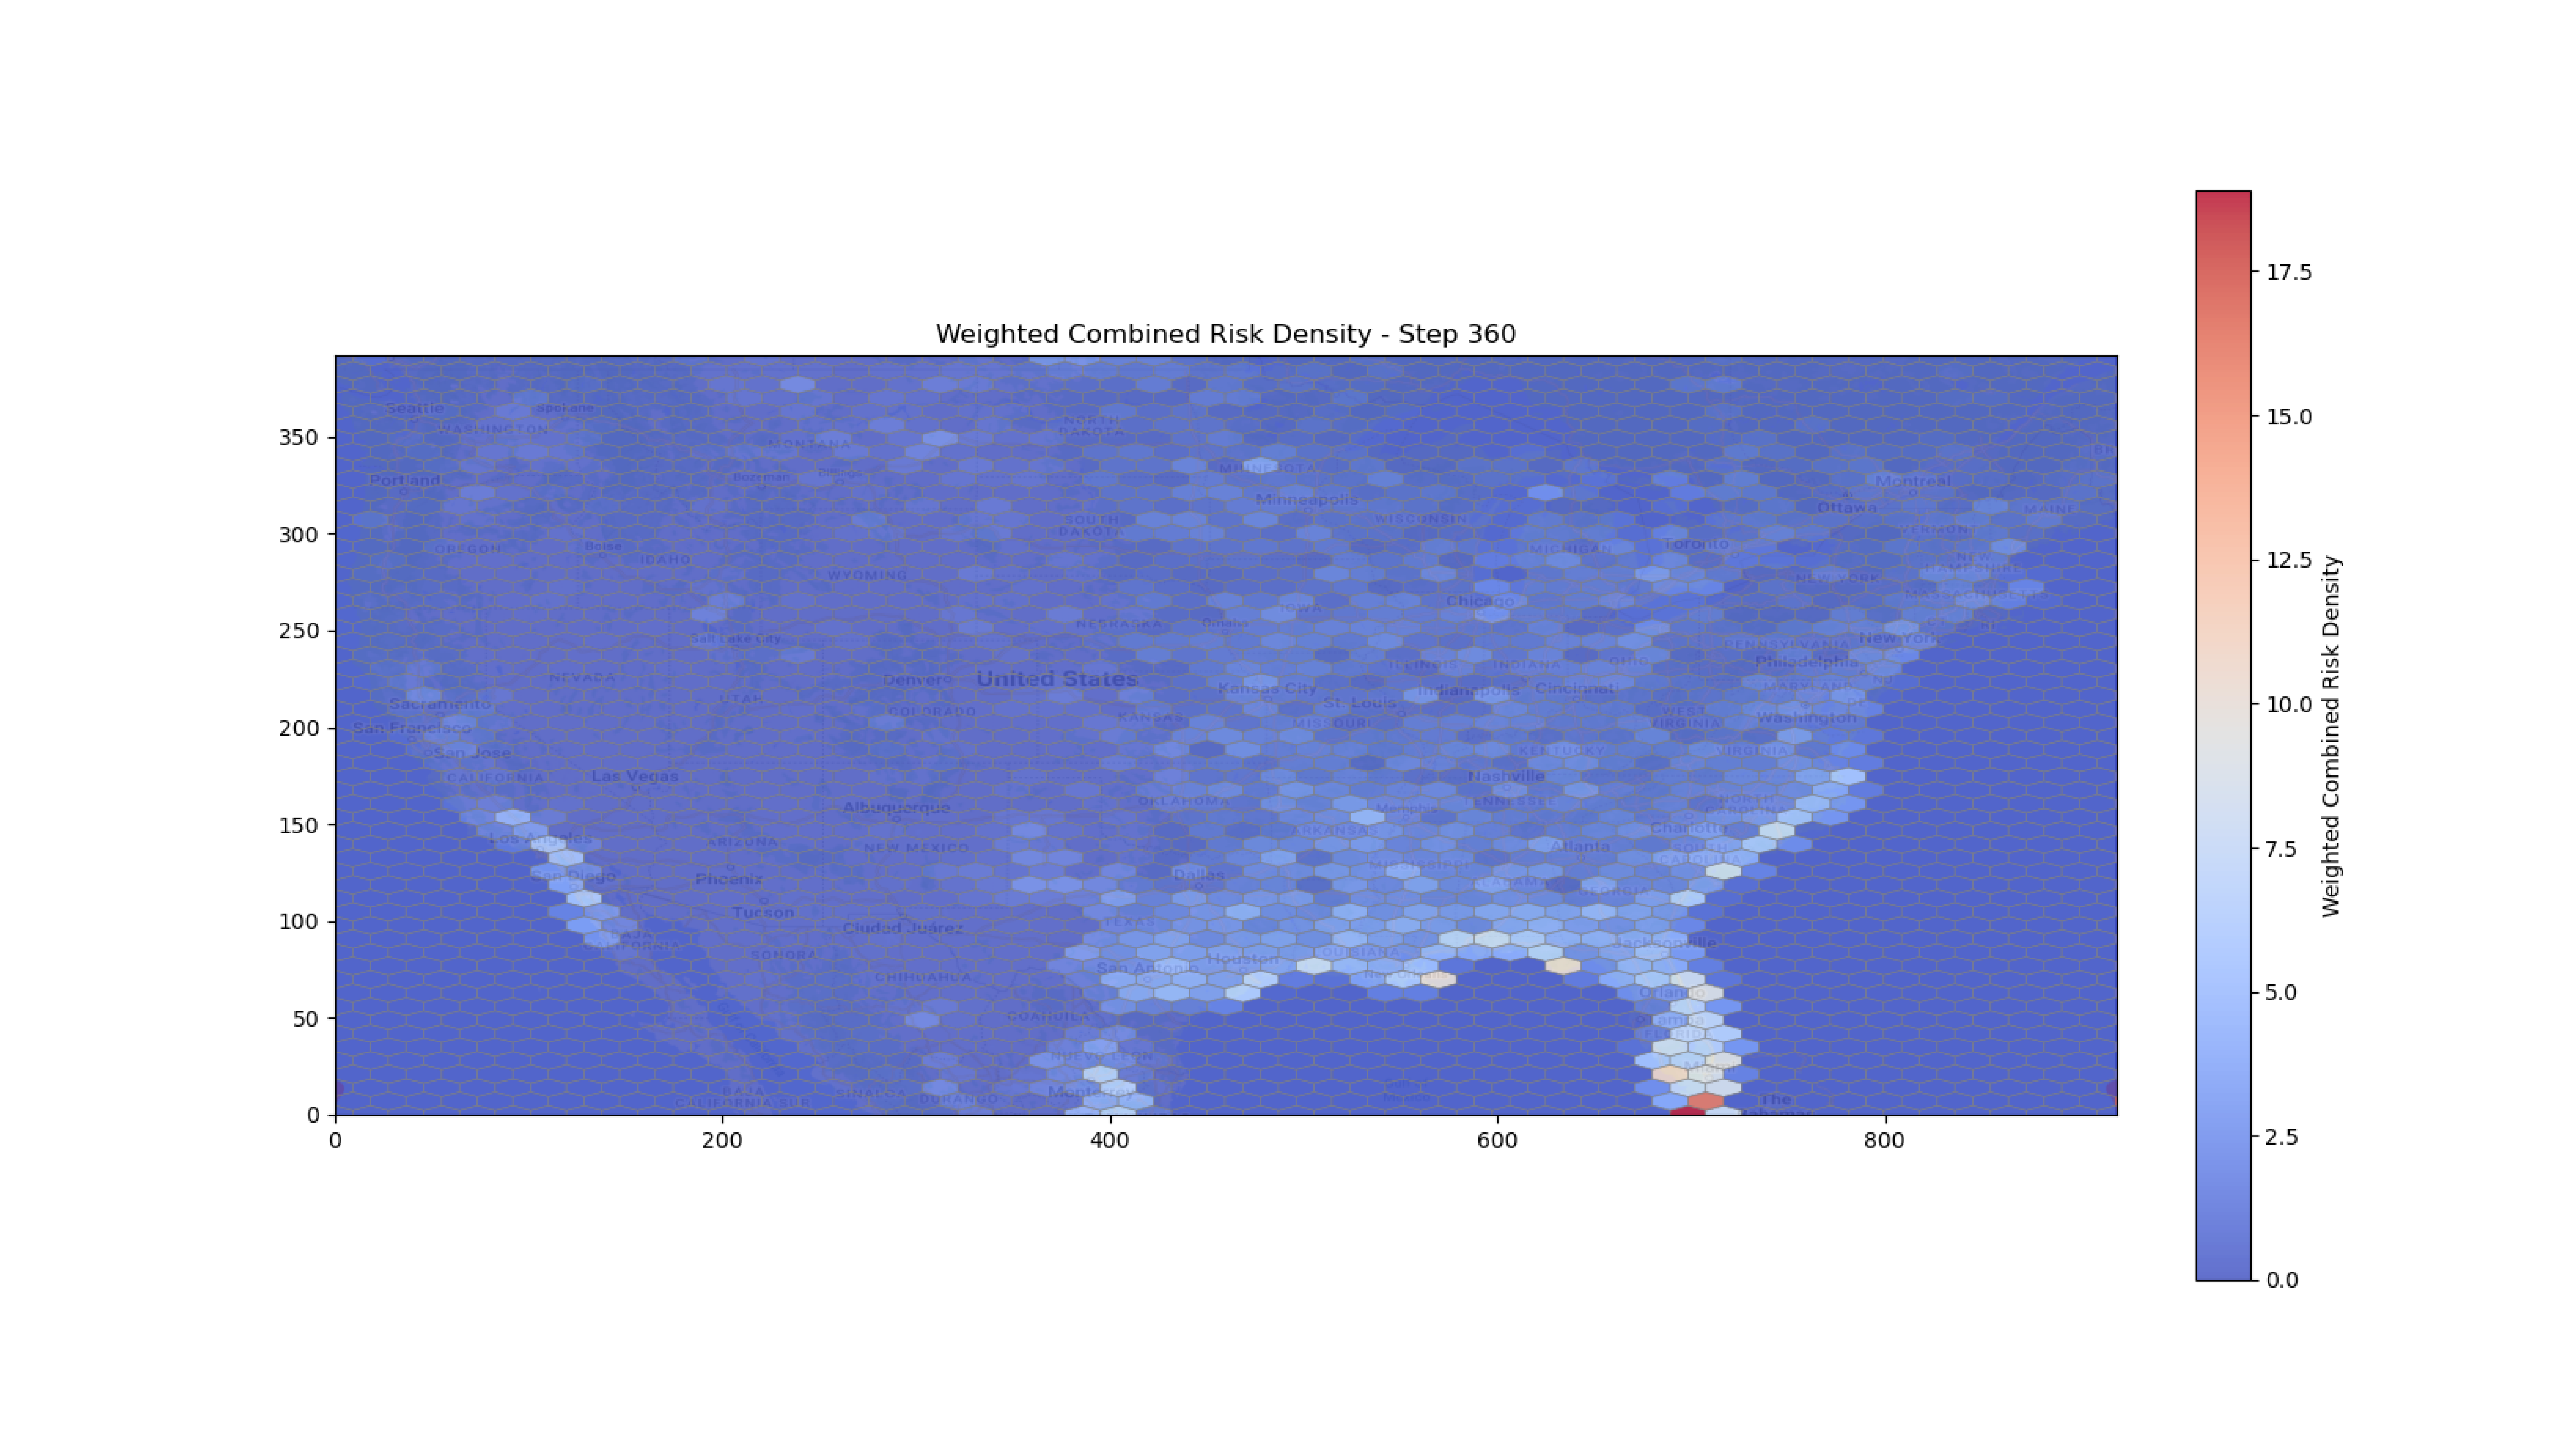

In [21]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import os

def create_animation_from_images(image_folder, output_video_file='animation.mp4', fps=5, dpi=300, bitrate=1800):
    """
    Create an animation video file from images with adjustable quality.

    Parameters:
    - image_folder: Path to the folder containing the images.
    - output_video_file: The name of the output video file.
    - fps: Frames per second for the animation.
    - dpi: Dots per inch for the video quality (higher value = higher quality).
    - bitrate: Bitrate for the video (higher value = larger file size and better quality).
    """
    # Get a sorted list of image files from the folder
    images = sorted([img for img in os.listdir(image_folder) if img.endswith(".png")])

    # Read the first image to get dimensions and set figure size accordingly
    first_image = Image.open(os.path.join(image_folder, images[0]))
    width, height = first_image.size
    fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=dpi)  # Adjust figure size based on image size
    img_plot = ax.imshow(first_image)

    # Remove axis for a cleaner view
    ax.axis('off')

    # Function to update the image for each frame
    def update(frame):
        img = Image.open(os.path.join(image_folder, images[frame]))
        img_plot.set_data(img)
        return [img_plot]

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(images), blit=True, repeat=False)

    # Define the writer with quality settings
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=fps, metadata=dict(artist='Matplotlib'), bitrate=bitrate)

    # Save the animation as a video file with the specified settings
    ani.save(os.path.join(image_folder, output_video_file), writer=writer, dpi=dpi)
    print(f"Animation saved as {output_video_file} in folder: {image_folder} with quality settings (DPI={dpi}, Bitrate={bitrate} kbps)")

# Example usage
create_animation_from_images(image_folder='Op2_weighted_combined_risk', output_video_file='high_quality_animation.mp4', fps=10, dpi=500, bitrate=3000)
